# Tree-Based Methods

After a first taste of machine learning modeling with simple linear models that are common also to econometrics, we now dive into the **Tree-Based Methods**. These ML models are powerful and largely employed in the financial space. Our strategy to introduce those models is:

- *Explore* the underlying reasoning of a tree-based model and observe a simple application outside the financial domains.

- *Extend* the use ofthese tree-based models through some powerful algorithms and see a couple of financial applications (in the next lecture).

It is always important to follow these steps: *first* understand the model on basic problems, *then* complicate it and adapt to a specific domain. We always remember that finance comes with its own challenges. If you start directly from a finance use-cases, you may lost some characteristics of the model.

## Background theory


Tree-based methods can take your dataset, partition it into different sets and fit a simple model to each partition. A very popular method for tree-based model is called **CART**, which stands for *classification and regression tree*. As the name suggest trees can do either *regression* or *classification* with slight changes.

Consider a simple regression problem where we have a $Y$ and two inputs $X_{1}$ and $X_{2}$ that takes value in the unit interval. *Tree-based methods* construct binary partition of the feature space.

<img src="images/binary_split.png" width="400">

    
<img src="images/tree_split.png" width="400">


In each binary partition element we can model $Y$ with the mean of $Y$ in each region. *We choose the variable and split-point to achieve the best split*. The result of this process is a partition into the five regions $R_{1}, R_{2}, \ldots, R_{5}$. The corresponding regression model predicts $Y$ with a constant $c_{m}$ in region $R_{m}$, that is,
$$
\hat{f}(X)=\sum_{m=1}^{5} c_{m} I\left\{\left(X_{1}, X_{2}\right) \in R_{m}\right\}
$$

**Every tree works like this**, either you are solving a classification or a regression problem. *The full dataset sits at the top of the tree*. Observations satisfying the condition at each junction are assigned to the left branch, and the others to the right branch. The terminal nodes or leaves of the tree correspond to the regions $R_{1}, R_{2}, \ldots, R_{5}$. 


**Why do we consider these apparently simple partition so powerful?**

It is all about **interpretability**. Binary trees are easier to interpret, even though would be hard to draw the scheme of the tree with more than two inputs, which is often the case in many applications.

## Regression tree

The first important question is *how to grow a regression tree*. The data consists of $p$ inputs and a response, for each of $N$ observations: that is, $\left(x_{i}, y_{i}\right)$ for $i=1,2, \ldots, N$, with $x_{i}=\left(x_{i 1}, x_{i 2}, \ldots, x_{i p}\right)$. The algorithms needs to automatically decide on *splitting variables* and *split points*, other than the shape of the tree itself (how many nodes and leaves).

Starting with all of the data, consider a splitting variable $j$ and split point $s$, and define the pair of half-planes
$$
R_{1}(j, s)=\left\{X \mid X_{j} \leq s\right\} \text { and } R_{2}(j, s)=\left\{X \mid X_{j}>s\right\} .
$$
Then we seek the splitting variable $j$ and split point $s$ that solve
$$
\min _{j, s}\left[\min _{c_{1}} \sum_{x_{i} \in R_{1}(j, s)}\left(y_{i}-c_{1}\right)^{2}+\min _{c_{2}} \sum_{x_{i} \in R_{2}(j, s)}\left(y_{i}-c_{2}\right)^{2}\right] .
$$
For any choice $j$ and $s$, the inner minimization is solved by
$$
\hat{c}_{1}=\operatorname{ave}\left(y_{i} \mid x_{i} \in R_{1}(j, s)\right) \text { and } \hat{c}_{2}=\operatorname{ave}\left(y_{i} \mid x_{i} \in R_{2}(j, s)\right) .
$$
For each splitting variable, the determination of the split point $s$ can be done very quickly and hence by scanning through all of the inputs, determination of the best pair $(j, s)$ is feasible.

**Having found the best split, we partition the data into the two resulting regions and repeat the splitting process on each of the two regions.** This iterative process is at the core of the tree-based mechanisms and is repeated on all of the resulting regions.


**How large should we grow the tree?** A very large tree might **overfit** (*remember?*) the data, while a small tree might not capture the important structure.

*The size of the tree* is a parameter to tune and regulates the model complexity.


*One approach would be to split tree nodes only if the decrease in sum-of-squares due to the split exceeds some threshold. This strategy is too **short-sighted**, however, since a seemingly worthless split might lead to a very good split below it.* 

**What's the strategy to adopt then?**

- Grow a large tree $T_{0}$ by stopping the split only when a minimum number of node is reached.
- Prune (cut the non-terminal branches) using a cost-complexity criteria to get the best compromise between size and representational power.

**Cost-complexity criteria**

We define a subtree $T \subset T_{0}$ to be any tree that can be obtained by pruning $T_{0}$, that is, collapsing any number of its internal (non-terminal) nodes. We index terminal nodes by $m$, with node $m$ representing region $R_{m}$. Let $|T|$ denote the number of terminal nodes in $T$. Letting
$$
\begin{aligned}
N_{m} &=\#\left\{x_{i} \in R_{m}\right\}, \\
\hat{c}_{m} &=\frac{1}{N_{m}} \sum_{x_{i} \in R_{m}} y_{i} \\
Q_{m}(T) &=\frac{1}{N_{m}} \sum_{x_{i} \in R_{m}}\left(y_{i}-\hat{c}_{m}\right)^{2}
\end{aligned}
$$
we define the cost complexity criterion
$$
C_{\alpha}(T)=\sum_{m=1}^{|T|} N_{m} Q_{m}(T)+\alpha|T|
$$

*The idea is to find, for each $\alpha$, the subtree $T_{\alpha} \subseteq T_{0}$ to minimize $C_{\alpha}(T)$*. 

**The parameter $\alpha \geq 0$ need to be tuned and governs the tradeoff between tree size and its goodness of fit to the data.**

- Large values of $\alpha$ result in smaller trees. 
- Small values of $\alpha$ result in bigger trees.
- $\alpha=0$ results in the full tree $T_{0}$. 


For each $\alpha$ one can show that there is a unique smallest subtree $T_{\alpha}$ that minimizes $C_{\alpha}(T)$. To find $T_{\alpha}$ we use weakest link pruning: we successively collapse the internal node that produces the smallest per-node increase in $\sum_{m} N_{m} Q_{m}(T)$, and continue until we produce the single-node (root) tree. 

Estimation of $\alpha$ is achieved by cross-validation: we choose the value $\hat{\alpha}$ to minimize the cross-validated sum of squares. 


## Classification tree

The substantial difference between a regression tree and a classification tree (as many other algorithms that can do both task) is in the type of outcome values. While for the former the outcome is a real value, for the latter is a discrete set of values $1,2, \ldots, K$. This means that the only change needed is the criteria for splitting and pruning. The impurity measure $Q_{m}(T)$  used above for regression tree is not useful anymore.

Define the proportion of class $k$ observations in node $m$, representing a region $R_{m}$ with $N_{m}$ observations, as
$$
\hat{p}_{m k}=\frac{1}{N_{m}} \sum_{x_{i} \in R_{m}} I\left(y_{i}=k\right),
$$

We can classify the observations in node $m$ to class $k(m)=\arg \max _{k} \hat{p}_{m k}$, the majority class in node $m$. Useful measures $Q_{m}(T)$ of node impurity include the following:


$$\begin{array}{ll}\text { Misclassification error: } & \frac{1}{N_{m}} \sum_{i \in R_{m}} I\left(y_{i} \neq k(m)\right)=1-\hat{p}_{m k(m)} . \\ \text { Gini index: } & \sum_{k \neq k^{\prime}} \hat{p}_{m k} \hat{p}_{m k^{\prime}}=\sum_{k=1}^{K} \hat{p}_{m k}\left(1-\hat{p}_{m k}\right) . \\ \text { Cross-entropy or deviance: } & -\sum_{k=1}^{K} \hat{p}_{m k} \log \hat{p}_{m k} .\end{array}$$

<img src="images/class_tree_metrics.png" width="400">

For two classes, if $p$ is the proportion in the second class, these three measures are $1-\max (p, 1-p), 2 p(1-p)$ and $-p \log p-(1-p) \log (1-p)$, respectively. All three are similar, but crossentropy and the Gini index are differentiable (look at the figure), and hence more tractable with numerical optimization. 

*For this reason, either the Gini index or cross-entropy should be used when growing the tree. To guide cost-complexity pruning, any of the three measures can be used, but typically it is the misclassification rate.* Refer to the book for the reason of this choice.

The Gini index can be interpreted in two interesting ways. Rather than classify observations to the majority class in the node, we could classify them to class $k$ with probability $\hat{p}_{m k}$. Then the expected training error rate of this rule in the node is $\sum_{k \neq k^{\prime}} \hat{p}_{m k} \hat{p}_{m k^{\prime}}$ - the Gini index. Similarly, if we code each observation as 1 for class $k$ and zero otherwise, the variance over the node of this 0 - 1 response is $\hat{p}_{m k}\left(1-\hat{p}_{m k}\right)$. Summing over classes $k$ again gives the Gini index.

**Let's look at some code now**. We will see how to use these models on some toy problems.

**Note**: to produce the following visualization you will need to install the [Graphviz software](https://www.graphviz.org/download/) and the python package to use it from here. You can download the former at the provided link and install the Python Package by doing `pip install graphviz` in the terminal. Be sure to add Graphviz to the system variable.

In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from graphviz import Source
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    mean_squared_error,
    accuracy_score,
)
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# The classification toy problem
Let's observe the dataset first. A detailed information can be found [here](https://archive.ics.uci.edu/ml/datasets/iris).

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

In [4]:
df["target"].unique()

array([0., 1., 2.])

**Why do we say that this dataset is suitable for a classification problem?**

In [5]:
df["target"].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

# Classification

[Decision Tree Classifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [6]:
X = iris.data[:, 2:]  # petal length and width
y = iris.target

In [7]:
iris.data[:, 2:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [8]:
(X[:,0] == 2.5).sum()

0

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

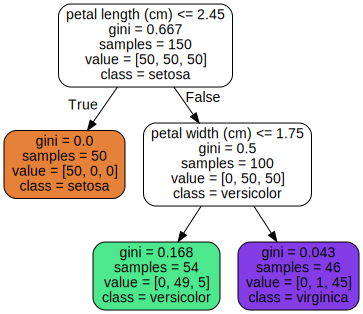

In [10]:
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

**Scikit-learn's CART Algorithm and Split Points**

In scikit-learn's implementation of the CART (Classification and Regression Trees) algorithm, split points are determined as the average of consecutive, unique values of the feature under consideration for a split. Specifically, if two adjacent unique values in a sorted feature column are \(a\) and \(b\), the potential split point \(s\) is calculated as:

\[
s = \frac{a + b}{2}
\]

**Implications**

Although the calculated split point may not be a value present in the original dataset, it is still influenced by the dataset's unique feature values. This ensures that the calculated split point is representative of the range and distribution of the feature values in the dataset.

**Other Implementations**

It's worth mentioning that other implementations of decision tree algorithms may directly use unique feature values as split points. The choice between these methods can depend on various factors, including the specific problem being solved and computational efficiency considerations.

Look at the cell below to see this in practice

In [11]:
# the split point on top of the decision tree above is 2.45 for petal width (first feature)

np.sort(X[:,0]) # by ordering all the values we observe that the split point is between 1.9 and 3, whose average is exactly 2.45

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3,
       3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7,
       4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2,
       5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1,
       6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

Text(4.05, 0.5, '(Depth=2)')

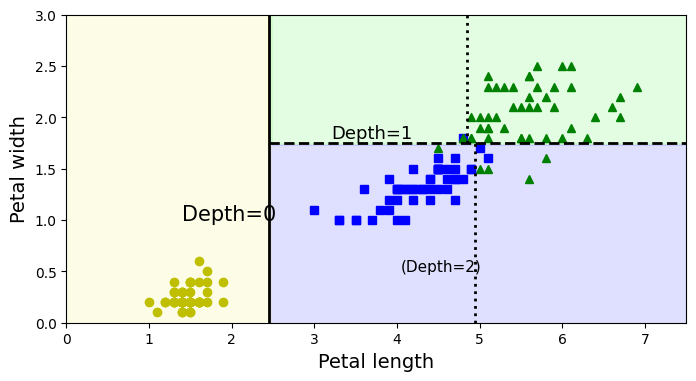

In [12]:
def plot_decision_boundary(
    clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True
):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)



## Predicting classes and class probabilities

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
tree_clf

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
tree_clf.predict_proba([[1.5, 2.0], [4.5, 1.0]])

array([[1.        , 0.        , 0.        ],
       [0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5, 1.5]])

array([1])

# Train and test the model

In [19]:
X.shape

(150, 2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
X_train.shape

(120, 2)

In [22]:
X_test.shape

(30, 2)

In [23]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [24]:
y_hat = tree_clf.predict(X_test)

In [25]:
y_hat

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
print(confusion_matrix(y_test, y_hat))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [27]:
confusion_matrix(y_test, y_hat).sum()

30

In [28]:
len(y_test)

30

In [29]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Sensitivity to training set details

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [31]:
X[(X[:, 1] == X[:, 1][y == 1].max()) & (y == 1)]  # widest Iris versicolor flower

array([[4.8, 1.8]])

In [32]:
not_widest_versicolor = (X[:, 1] != 1.8) | (y == 2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [33]:
X_tweaked.shape

(149, 2)

Text(1.0, 1.8, 'Depth=1')

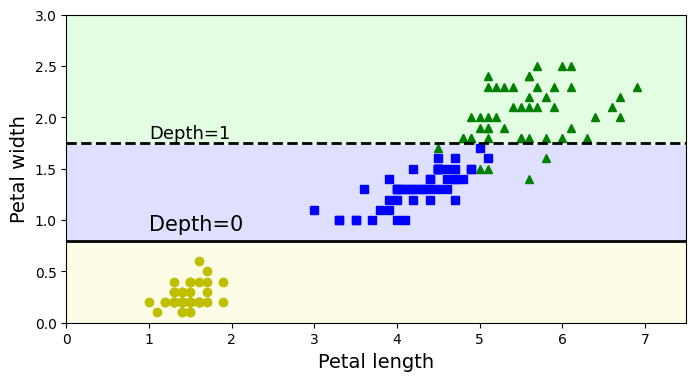

In [34]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)



## Another toy example

Text(0, 0.5, '')

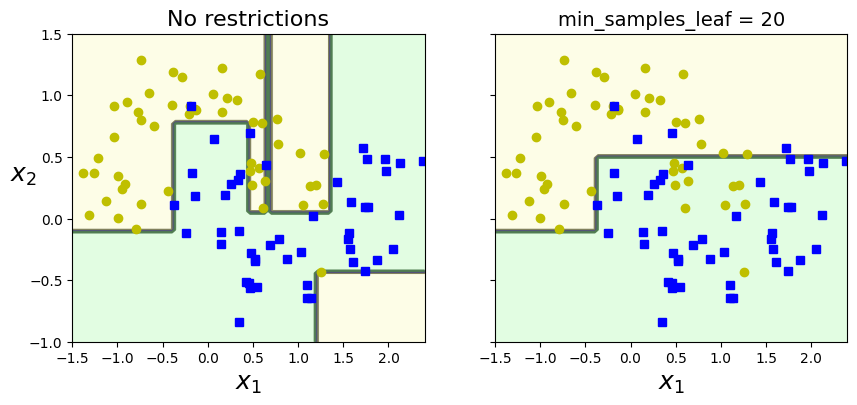

In [35]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")



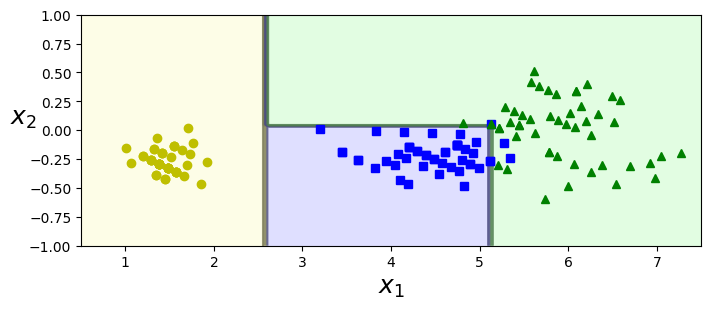

In [36]:
angle = np.pi / 180 * 20
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
)
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Text(0, 0.5, '')

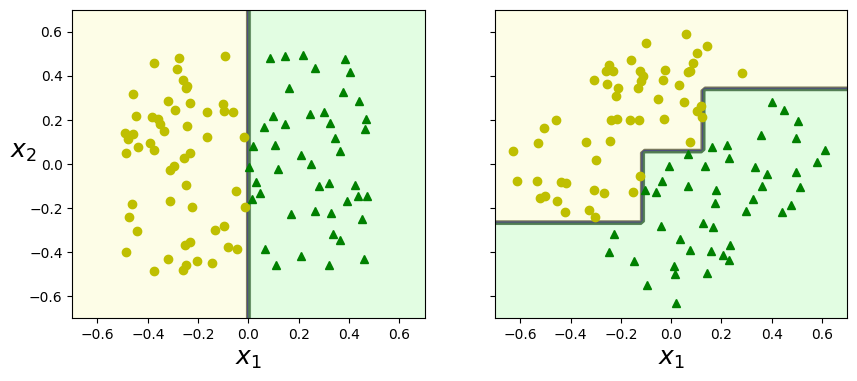

In [37]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
)
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")



# Regression trees

In [38]:
# Quadratic training set + noise
# np.random.seed(42)
rng = np.random.RandomState(42)
m = 200
X = rng.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [39]:
X[:5]

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864]])

In [40]:
for i in range(5):
    print(rng.rand(m, 1).mean())

0.5043751357761393
0.5206727838759302
0.47877114912863833
0.4634574645533443
0.5436516398170126


In [41]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Text(0.5, 1.0, 'max_depth=3')

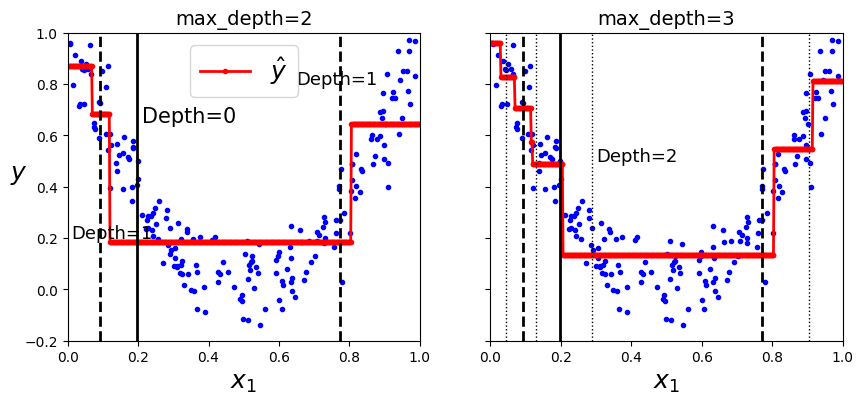

In [42]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)



In [43]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True,
)

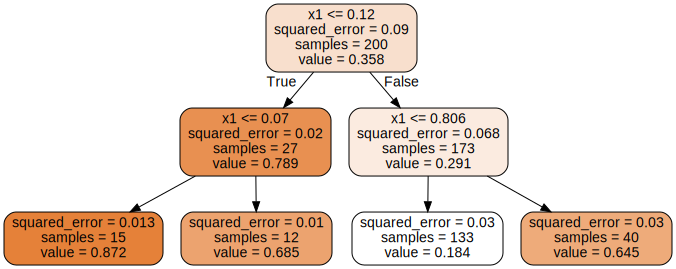

In [44]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

Text(0.5, 1.0, 'min_samples_leaf=10')

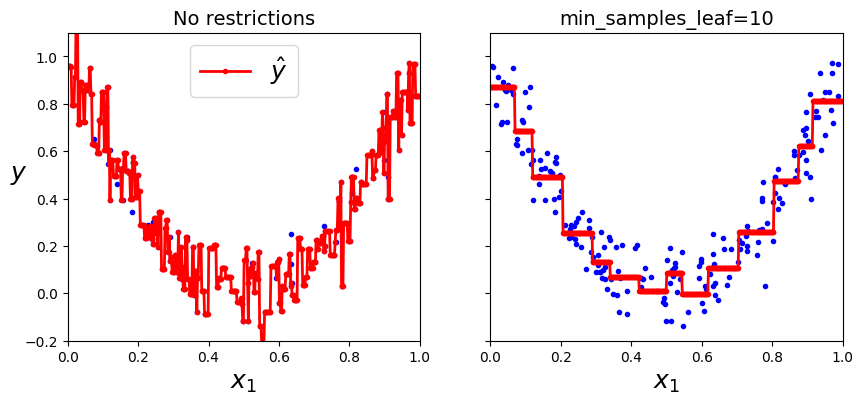

In [45]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


# Predicting S&P500 Index

In [46]:
def add_lags(df, columns, n_lags=1):
    """
    Add lags to specific columns in a DataFrame.

    Parameters:
    - df (DataFrame): Original DataFrame.
    - columns (list): List of column names for which to create lags.
    - n_lags (int): Number of lags to create for each column.

    Returns:
    - DataFrame: Updated DataFrame with lag columns.
    """
    for column in columns:
        for lag in range(1, n_lags + 1):
            df[f"{column}_lag{lag}"] = df[column].shift(lag)
    return df


df = pd.read_csv("data\Rv_daily_lec4.csv", index_col=0)

col_to_transform = ["TBill3M", "TBill1Y", "Oil", "Gold", "SP_volume"]
for c in col_to_transform:
    df["{}_ret".format(c)] = df[c].pct_change(1) * 100
df = df.dropna()

df = add_lags(df, ["Return_close"], n_lags=3)
df = df.dropna()
df = df.replace([np.inf, -np.inf], 0)

df["Ret_binary"] = (df["Return_close"] > 0).astype(int)

In [47]:
df.head()

,TBill3M,TBill1Y,Oil,RV,Return_close,Gold,SP_close,SP_volume,Holiday,weekday,TBill3M_ret,TBill1Y_ret,Oil_ret,Gold_ret,SP_volume_ret,Return_close_lag1,Return_close_lag2,Return_close_lag3,Ret_binary
1986-01-08,7.40,7.73,25.87,1.211581,-3.677058,332.60,207.970001,180300000,False,2,1.928375,1.844532,0.077369,0.787879,17.843137,1.304468,0.140779,0.659602,0
1986-01-09,7.41,7.83,26.03,1.614507,-0.674539,333.50,206.110001,176500000,False,3,0.135135,1.293661,0.618477,0.270595,-2.107598,-3.677058,1.304468,0.140779,0
1986-01-10,7.44,7.89,25.65,1.111899,-0.242014,340.45,205.960007,122800000,False,4,0.404858,0.766284,-1.459854,2.083958,-30.424929,-0.674539,-3.677058,1.304468,0
1986-01-13,7.48,7.95,25.08,1.300182,0.507554,339.40,206.720001,108700000,False,0,0.537634,0.760456,-2.222222,-0.308415,-11.482085,-0.242014,-0.674539,-3.677058,1
1986-01-14,7.48,7.93,24.97,1.020525,-0.096479,341.00,206.639999,113900000,False,1,0.000000,-0.251572,-0.438596,0.471420,4.783809,0.507554,-0.242014,-0.674539,0


## Regression Problem

In [48]:
# Select features (replace with actual feature names)
features = ["RV", "TBill1Y_ret"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df["Return_close"], test_size=0.2, random_state=42
)

# Initialize Regression Tree Model
regression_tree_model = DecisionTreeRegressor()

# Fit the model
regression_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_reg = regression_tree_model.predict(X_test)

mse_regression = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error for Regression: {mse_regression}")

Mean Squared Error for Regression: 3.3001328540728663


## Classification Problem

In [49]:
df.columns

Index(['TBill3M', 'TBill1Y', 'Oil', 'RV', 'Return_close', 'Gold', 'SP_close',
       'SP_volume', 'Holiday', 'weekday', 'TBill3M_ret', 'TBill1Y_ret',
       'Oil_ret', 'Gold_ret', 'SP_volume_ret', 'Return_close_lag1',
       'Return_close_lag2', 'Return_close_lag3', 'Ret_binary'],
      dtype='object')

In [50]:
# Select features (replace with actual feature names)
features = [
    "weekday",
    "TBill3M_ret",
    "TBill1Y_ret",
    "Oil_ret",
    "Gold_ret",
    "SP_volume_ret",
    "Return_close_lag1",
    "Return_close_lag2",
    "Return_close_lag3",
]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df["Ret_binary"], test_size=0.2, random_state=42
)

# Initialize Decision Tree Model
decision_tree_model = DecisionTreeClassifier()

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_class = decision_tree_model.predict(X_test)

accuracy_classification = accuracy_score(y_test, y_pred_class)
print(f"Accuracy for Classification: {accuracy_classification}")

Accuracy for Classification: 0.5201401050788091


In [51]:
# Select features (replace with actual feature names)
features = [
    "RV",
    "weekday",
    "TBill3M_ret",
    "TBill1Y_ret",
    "Oil_ret",
    "Gold_ret",
    "SP_volume_ret",
    "Return_close_lag1",
    "Return_close_lag2",
    "Return_close_lag3",
]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df["Ret_binary"], test_size=0.2, random_state=42
)

# Initialize Random Forest Model
random_forest_model = RandomForestClassifier(
    criterion="log_loss", max_depth=25, min_samples_leaf=100, random_state=35
)

# Fit the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_class = random_forest_model.predict(X_test)

accuracy_classification = accuracy_score(y_test, y_pred_class)
print(f"Accuracy for Classification: {accuracy_classification}")

Accuracy for Classification: 0.5989492119089317


# Issues, weaknesses and things to remark

**Categorical Features**
When splitting a feature having $q$ possible unordered values, there are $2^{q-1}-1$ possible partitions of the $q$ values into two groups, and the computations become prohibitive for large $q$. However, with a $0-1$ outcome, this computation simplifies. We order the feature classes according to the proportion falling in outcome class 1. Then we split this feature as if it were an ordered feature.


One can show this gives the optimal split, in terms of cross-entropy or Gini index, among all possible $2^{q-1}-1$ splits. This result also holds for a quantitative outcome and square error loss-the categories are ordered by increasing mean of the outcome. 


**The Loss Matrix**

In classification problems, the consequences of misclassifying observations are more serious in some classes than others. For example, it is probably worse to predict that a person will not have a heart attack when he/she actually will, than vice versa. To account for this, we define a $K \times K$ loss matrix $\mathbf{L}$, with $L_{k k^{\prime}}$ being the loss incurred for classifying a class $k$ observation as class $k^{\prime}$. Typically no loss is incurred for correct classifications,

**Linear Combination Splits**
Rather than restricting splits to be of the form $X_{j} \leq s$, one can allow splits along linear combinations of the form $\sum a_{j} X_{j} \leq s$. The weights $a_{j}$ and split point $s$ are optimized to minimize the relevant criterion (such as the Gini index). While this can improve the predictive power of the tree, it can hurt *interpretability*. Computationally, the discreteness of the split point search precludes the use of a smooth optimization for the weights. A better way to incorporate linear combination splits is in the hierarchical mixtures of experts (HME) model (Section 9.5 of the book)


**Instability of Trees**
One major problem with trees is their *high variance*. Often a small change in the data can result in a very different series of splits, making interpretation somewhat precarious. The major reason for this instability is the hierarchical nature of the process: the effect of an error in the top split is propagated down to all of the splits below it. One can alleviate this to some degree by trying to use a more stable split criterion, but the inherent instability is not removed. It is the price to be paid for estimating a simple, tree-based structure from the data. 


**Lack of Smoothness**
Another limitation of trees is the lack of smoothness of the prediction surface. In classification with $0 / 1$ loss, this doesn't hurt much, since bias in estimation of the class probabilities has a limited effect. However, this can degrade performance in the regression setting, where we would normally expect the underlying function to be smooth. 

**Difficulty in Capturing Additive Structure**
Another problem with trees is their difficulty in modeling additive structure. In regression, suppose, for example, that $Y=c_{1} I\left(X_{1}<t_{1}\right)+c_{2} I\left(X_{2}<\right.$ $\left.t_{2}\right)+\varepsilon$ where $\varepsilon$ is zero-mean noise. Then a binary tree might make its first split on $X_{1}$ near $t_{1}$. At the next level down it would have to split both nodes on $X_{2}$ at $t_{2}$ in order to capture the additive structure. This might happen with sufficient data, but the model is given no special encouragement to find such structure. If there were ten rather than two additive effects, it would take many fortuitous splits to recreate the structure, and the data analyst would be hard pressed to recognize it in the estimated tree. The "blame" here can again be attributed to the binary tree structure, which has both advantages and drawbacks. Again the MARS method (Section 9.4) gives up this tree structure in order to capture additive structure.

**Why do we talk about trees if they have some many problems?**

Trees are weak learners (do you know what does it mean?).

Being weak learners still means that they can be used in **ensemble** models and their simple but effective reasoning can be leveraged. In the next lecture we will introduce two techniques:
- **Bagging** with Random Forest, averaging many trees.
- **Boosting** with Adaboost, repeatedly training weak learners to improve classification/regression.

